In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras import layers


# Loading Mnist

In [2]:
(X_train, Y_train), (X_test, Y_test) = tf.keras.datasets.mnist.load_data()

X_train = X_train/255
X_test = X_test/255

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step


In [ ]:
plt.imshow(X_train[0],cmap="Greys")

# Training with one-hot

In [18]:
model_lr = tf.keras.models.Sequential([
    layers.Input(X_train.shape[1:]),
    layers.Flatten(),
    layers.Dense(10,activation ="softmax")
])
model_lr.compile(optimizer ='adam', loss='categorical_crossentropy',metrics = ['accuracy'])
model_lr.summary()

Model: "sequential_6"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ flatten_4 (Flatten)                  │ (None, 784)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 10)                  │           7,850 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 7,850 (30.66 KB)

 Trainable params: 7,850 (30.66 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
y_onehot_train = tf.one_hot(Y_train,10)
model_lr.fit(X_train,y_onehot_train, epochs=3)

# Training with sparse labels

In [31]:
mode_lr = tf.keras.models.Sequential([
    layers.Input(X_train.shape[1:]),
    layers.Flatten(),
    layers.Dense(10,activation = 'softmax')
])
model_lr.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
model_lr.summary()

Model: "sequential_6"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ flatten_4 (Flatten)                  │ (None, 784)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 10)                  │           7,850 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 7,850 (30.66 KB)

 Trainable params: 7,850 (30.66 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
history_lr = model_lr.fit(X_train,Y_train, epochs=10, batch_size=128, validation_data=(X_test,Y_test), verbose=False)
history_lr.history

In [34]:
model_lr.evaluate(X_test,Y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9168 - loss: 0.2994


[0.2656806409358978, 0.9276999831199646]

# specifying layer by layer

In [43]:
inputs = tf.keras.Input(shape=(784,))
x = layers.Dense(16, activation='relu')(inputs)
x = layers.Dense(16,activation='relu')(x)
outputs = layers.Dense(10,activation='softmax')(x)
model = tf.keras.Model(inputs=inputs,outputs=outputs)

model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])
model.fit(X_train.reshape((-1,784)), Y_train, batch_size=32, epochs=5, verbose=2)
model.evaluate(X_test.reshape((-1,784)),Y_test,batch_size=32,verbose=2)


Epoch 1/5
1875/1875 - 4s - 2ms/step - accuracy: 0.8640 - loss: 0.4521
Epoch 2/5
1875/1875 - 5s - 3ms/step - accuracy: 0.9375 - loss: 0.2121
Epoch 3/5
1875/1875 - 6s - 3ms/step - accuracy: 0.9482 - loss: 0.1793
Epoch 4/5
1875/1875 - 3s - 1ms/step - accuracy: 0.9518 - loss: 0.1614
Epoch 5/5
1875/1875 - 5s - 3ms/step - accuracy: 0.9552 - loss: 0.1501
313/313 - 1s - 2ms/step - accuracy: 0.9514 - loss: 0.1655


[0.16548678278923035, 0.9513999819755554]

# Adding Model Complexity

In [45]:
model_mlp = tf.keras.models.Sequential([
        layers.Input(X_train.shape[1:]),
        layers.Flatten(),
        layers.Dense(64, activation='elu'),
        layers.Dense(64, activation='elu'),
        layers.Dense(10, activation='softmax')
    ])
model_mlp.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
model_mlp.summary()

Model: "sequential_11"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ flatten_9 (Flatten)                  │ (None, 784)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_23 (Dense)                     │ (None, 64)                  │          50,240 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_24 (Dense)                     │ (None, 64)                  │           4,160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_25 (Dense)                     │ (None, 10)                  │             650 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 55,050 (215.04 KB)

 Trainable params: 55,050 (215.04 KB)

 Non-trainable params: 0 (0.00 B)

In [49]:
history_mlp = model_mlp.fit(X_train, Y_train, epochs=10, batch_size=128, validation_data=(X_test, Y_test), verbose=False)
history_mlp.history


{'accuracy': [0.9885500073432922,
  0.9907166957855225,
  0.9918666481971741,
  0.9920666813850403,
  0.9939333200454712,
  0.9956666827201843,
  0.9951833486557007,
  0.9955999851226807,
  0.9962166547775269,
  0.9962666630744934],
 'loss': [0.03608705475926399,
  0.029578305780887604,
  0.02639225497841835,
  0.023800592869520187,
  0.019938984885811806,
  0.01630755327641964,
  0.01568676345050335,
  0.013996543362736702,
  0.012045767158269882,
  0.010956544429063797],
 'val_accuracy': [0.9740999937057495,
  0.9757999777793884,
  0.9768000245094299,
  0.9746999740600586,
  0.9757999777793884,
  0.9746000170707703,
  0.9753000140190125,
  0.9750999808311462,
  0.9749000072479248,
  0.9761999845504761],
 'val_loss': [0.08686619251966476,
  0.08530779927968979,
  0.0773041695356369,
  0.08441437780857086,
  0.08875209838151932,
  0.09022823721170425,
  0.09163518995046616,
  0.09775905311107635,
  0.09968633949756622,
  0.09722089022397995]}

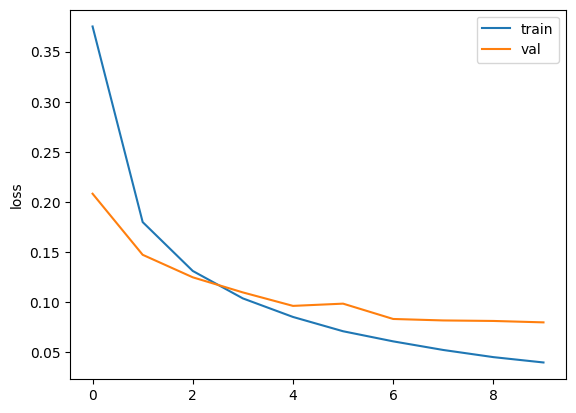

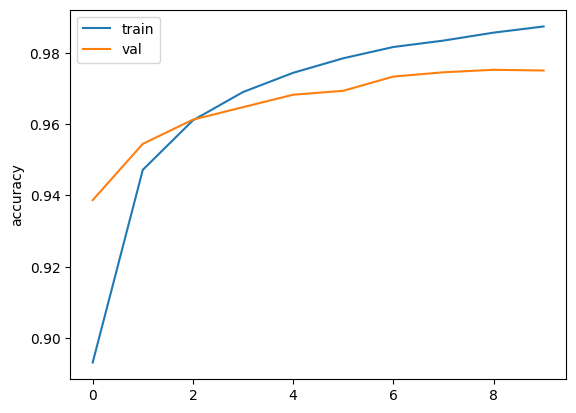

In [48]:
plt.plot(history_mlp.history['loss'], label='train')
plt.plot(history_mlp.history['val_loss'], label='val')
plt.ylabel('loss')
plt.legend()
plt.show()

plt.plot(history_mlp.history['accuracy'], label='train')
plt.plot(history_mlp.history['val_accuracy'], label='val')
plt.ylabel('accuracy')
plt.legend()
plt.show()